In [42]:
# Load final Dataset 
import pandas as pd 
import numpy as np

DATA_FOLDER = '../../data'
pd.set_option('display.max_columns', None)

#Load the final dataset
df = pd.read_csv(f"{DATA_FOLDER}/processed/df_final.csv")
df.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,WikiMovieID,CharacterName,CharacterID,Instances,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight,merge_title,merge_year,movieId,title,mean,std,count
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...","Set in the second half of the 22nd century, th...",975900.0,"{1: 'Akooshay', 2: 'Lieutenant Melanie Ballard...","{1: '/m/0bgcj3x', 2: '/m/0bgchn4', 3: '/m/0bgc...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0bgchxw', 2: '/m/0jys3m', 3: '/m/0jys3...","{1: '/m/03wcfv7', 2: '/m/0346l4', 3: '/m/01vw2...","{1: 'Wanda De Jesus', 2: 'Natasha Henstridge',...","{1: 42.0, 2: 27.0, 3: 32.0, 4: 33.0, 5: 23.0, ...","{1: 'F', 2: 'F', 3: 'M', 4: 'M', 5: 'F', 6: 'F...","{1: '1958-08-26', 2: '1974-08-15', 3: '1969-06...","{1: 1.62, 2: 1.78, 3: 1.727, 4: 1.75, 5: 1.65,...",ghosts of mars,2001.0,4735.0,Ghosts of Mars (2001),2.35196,1.064942,1709.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",NaN,3196793.0,"{1: 'Police Officer', 2: 'Reporter', 3: nan, 4...","{1: '/m/0lr3z80', 2: '/m/0lr3z8g', 3: nan, 4: ...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0lr37fl', 2: '/m/0lr37d8', 3: '/m/0lr3...","{1: '/m/0h8pnlw', 2: '/m/034dbm', 3: '/m/0lr37...","{1: 'Allen Cutler', 2: 'Alice Barrett', 3: 'Ro...","{1: nan, 2: 43.0, 3: nan, 4: nan, 5: 50.0, 6: ...","{1: 'M', 2: 'F', 3: 'M', 4: 'F', 5: 'M', 6: 'M...","{1: nan, 2: '1956-12-19', 3: nan, 4: nan, 5: '...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: 1....",getting away with murder: the jonbenét ramsey ...,2000.0,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",NaN,28463795.0,"{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: '/m/0gct1bn', 2: '/m/0gct1bv', 3: '/m/0gct...","{1: '/m/053j7xf', 2: '/m/0gct1by', 3: '/m/0bwh...","{1: 'Frank Krog', 2: 'Kristin Kajander', 3: 'V...","{1: 33.0, 2: 28.0, 3: 40.0, 4: 30.0}","{1: 'M', 2: 'F', 3: 'M', 4: 'F'}","{1: '1954-10-05', 2: '1959-02-28', 3: '1947', ...","{1: nan, 2: nan, 3: nan, 4: nan}",brun bitter,1988.0,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",A series of murders of rich young women throug...,9363483.0,"{1: nan, 2: nan}","{1: nan, 2: nan}","{1: nan, 2: nan}","{1: '/m/02t9_0c', 2: '/m/02vct27'}","{1: '/m/036496', 2: '/m/07g60h'}","{1: 'David Keith', 2: 'Cathy Moriarty'}","{1: 32.0, 2: 26.0}","{1: 'M', 2: 'F'}","{1: '1954-05-08', 2: '1960-11-29'}","{1: 1.83, 2: 1.75}",white of the eye,1987.0,90015.0,White of the Eye (1987),3.00000,1.038328,33.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},{'/m/07s9rl0': 'Drama'},"

Plot length statistics:
count    42253.000000
mean      1784.350555
std       1808.800601
min         99.000000
25%        508.000000
50%       1079.000000
75%       2604.000000
max      28159.000000
Name: Plot, dtype: float64


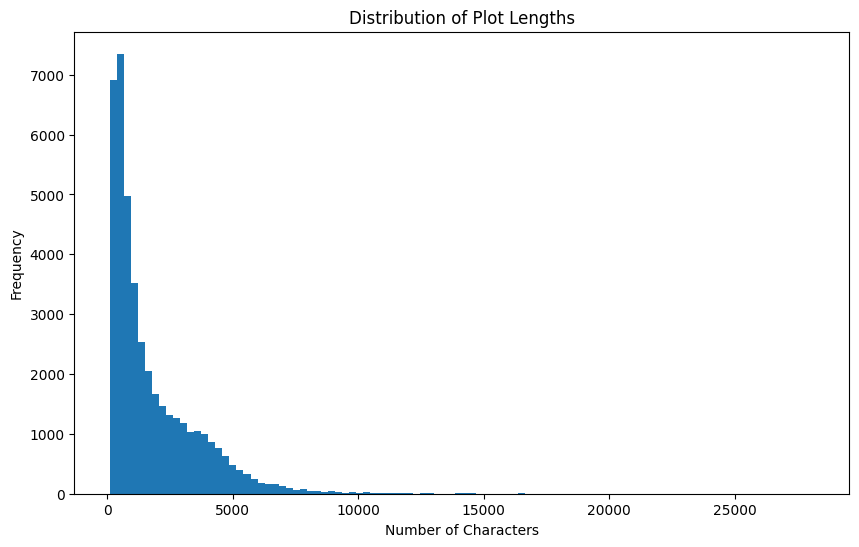

In [43]:
# Calculate plot lengths and show distribution
plot_lengths = df['Plot'].str.len().dropna()
print("Plot length statistics:")
print(plot_lengths.describe())

# Optional visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(plot_lengths, bins=100)
plt.title('Distribution of Plot Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


In [44]:
import sys
sys.path.append('../')
from utils.emotion import get_emotions_nrclex, get_emotions_roberta
# Run NRCLex on all plots and save to new column
df['nrclex_emotions'] = df['Plot'].apply(lambda x: get_emotions_nrclex(x) if pd.notna(x) else None)
# Takes about a 60s

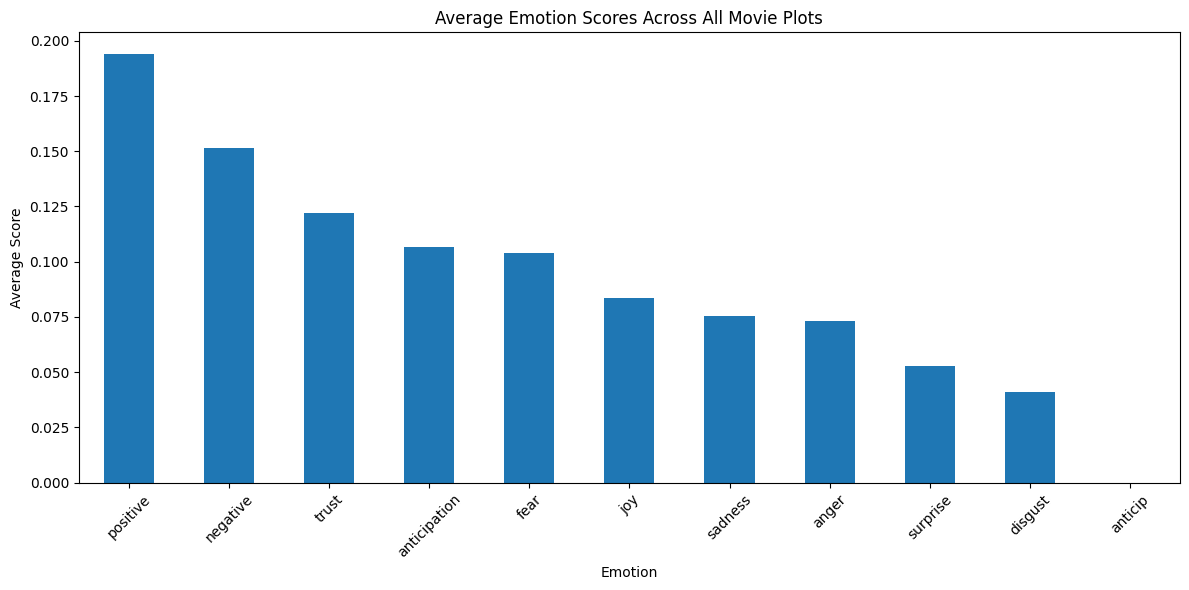

In [45]:
# Extract emotions into separate columns for plotting
emotions_df = pd.DataFrame(df['nrclex_emotions'].dropna().tolist())

# Calculate mean values
means = emotions_df.mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
means.plot(kind='bar')
plt.title('Average Emotion Scores Across All Movie Plots')
plt.xlabel('Emotion')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [46]:
import ast

def process_genre(genre_str):
    genre_dict = ast.literal_eval(genre_str)
    return list(genre_dict.values())


df['Genre_list'] = df['Genres'].apply(process_genre)

df.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,WikiMovieID,CharacterName,CharacterID,Instances,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight,merge_title,merge_year,movieId,title,mean,std,count,nrclex_emotions,Genre_list
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...","Set in the second half of the 22nd century, th...",975900.0,"{1: 'Akooshay', 2: 'Lieutenant Melanie Ballard...","{1: '/m/0bgcj3x', 2: '/m/0bgchn4', 3: '/m/0bgc...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0bgchxw', 2: '/m/0jys3m', 3: '/m/0jys3...","{1: '/m/03wcfv7', 2: '/m/0346l4', 3: '/m/01vw2...","{1: 'Wanda De Jesus', 2: 'Natasha Henstridge',...","{1: 42.0, 2: 27.0, 3: 32.0, 4: 33.0, 5: 23.0, ...","{1: 'F', 2: 'F', 3: 'M', 4: 'M', 5: 'F', 6: 'F...","{1: '1958-08-26', 2: '1974-08-15', 3: '1969-06...","{1: 1.62, 2: 1.78, 3: 1.727, 4: 1.75, 5: 1.65,...",ghosts of mars,2001.0,4735.0,Ghosts of Mars (2001),2.35196,1.064942,1709.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",NaN,3196793.0,"{1: 'Police Officer', 2: 'Reporter', 3: nan, 4...","{1: '/m/0lr3z80', 2: '/m/0lr3z8g', 3: nan, 4: ...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0lr37fl', 2: '/m/0lr37d8', 3: '/m/0lr3...","{1: '/m/0h8pnlw', 2: '/m/034dbm', 3: '/m/0lr37...","{1: 'Allen Cutler', 2: 'Alice Barrett', 3: 'Ro...","{1: nan, 2: 43.0, 3: nan, 4: nan, 5: 50.0, 6: ...","{1: 'M', 2: 'F', 3: 'M', 4: 'F', 5: 'M', 6: 'M...","{1: nan, 2: '1956-12-19', 3: nan, 4: nan, 5: '...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: 1....",getting away with murder: the jonbenét ramsey ...,2000.0,NaN,NaN,NaN,NaN,NaN,None,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",NaN,28463795.0,"{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: '/m/0gct1bn', 2: '/m/0gct1bv', 3: '/m/0gct...","{1: '/m/053j7xf', 2: '/m/0gct1by', 3: '/m/0bwh...","{1: 'Frank Krog', 2: 'Kristin Kajander', 3: 'V...","{1: 33.0, 2: 28.0, 3: 40.0, 4: 30.0}","{1: 'M', 2: 'F', 3: 'M', 4: 'F'}","{1: '1954-10-05', 2: '1959-02-28', 3: '1947', ...","{1: nan, 2: nan, 3: nan, 4: nan}",brun bitter,1988.0,NaN,NaN,NaN,NaN,NaN,None,"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",A series of murders of rich young women throug...,9363483.0,"{1: nan, 2: nan}","{1: nan, 2: nan}","{1: nan, 2: nan}","{1: '/m/02t9_0c', 2: '/m/02vct27'}","{1: '/m/036496', 2: '/m/07g60h'}","{1: 'David Keith', 2: 'Cathy Moriarty'}","{1: 32.0, 2: 26.0}","{1: 'M', 2: 'F'}","{1: '1954-05-08', 2: '1960-11-29'}","{1: 1.83, 2: 1.75}",white of the eye,1987.0,90015.0,White of the Eye (1987),3.00000,1.038328,33.0,"{'fear': 0.175141

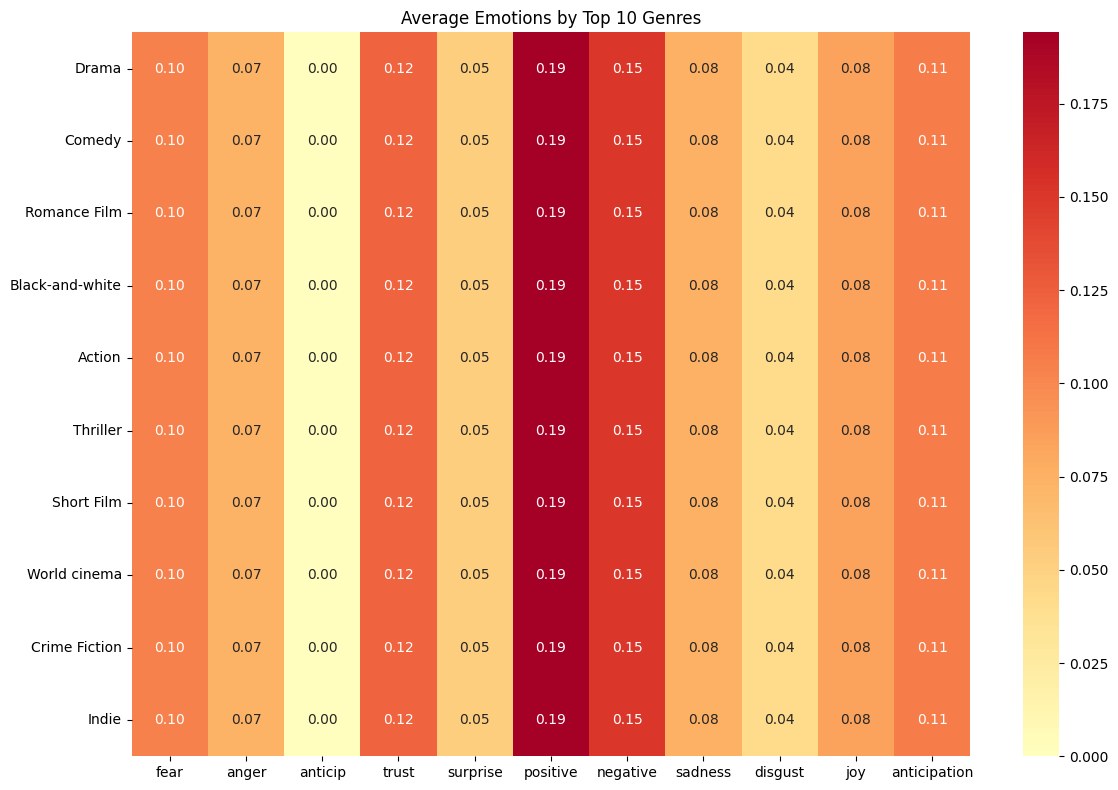

In [47]:
# Get list of all genres
def plot_top_genres(emotions_col: str):
    import seaborn as sns

    all_genres = []
    for genres in df['Genre_list'].dropna():
        all_genres.extend(genres)

    # Get 10 most common genres
    top_10_genres = pd.Series(all_genres).value_counts().head(10).index

    # Filter movies by top genres and get their emotions
    genre_emotions = {}
    for genre in top_10_genres:
        genre_emotions_list = df[emotions_col].dropna().tolist()
        genre_emotions[genre] = pd.DataFrame(genre_emotions_list).mean()

    # Convert to DataFrame for plotting
    genre_emotions_df = pd.DataFrame(genre_emotions).T

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(genre_emotions_df, cmap='RdYlBu_r', center=0, annot=True, fmt='.2f')
    plt.title('Average Emotions by Top 10 Genres')
    plt.tight_layout()
    plt.show()

plot_top_genres('nrclex_emotions')
# Obviously, it doesn't really make sense to run it on the entire plot...

In [48]:
# Let's look at the ending of each plots instead of all of them by taking the last 3 sentences.
# Ignore Nans


# Get endings for each plot (last 300 characters)
df['ending'] = df['Plot'].apply(lambda x: x[-300:] if pd.notna(x) else None)




In [49]:
# Let's look at endings
df['ending_nrclex'] = df['ending'].apply(lambda x: get_emotions_nrclex(x) if pd.notna(x) else None)
df.head()



,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,WikiMovieID,CharacterName,CharacterID,Instances,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight,merge_title,merge_year,movieId,title,mean,std,count,nrclex_emotions,Genre_list,ending,ending_nrclex
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...","Set in the second half of the 22nd century, th...",975900.0,"{1: 'Akooshay', 2: 'Lieutenant Melanie Ballard...","{1: '/m/0bgcj3x', 2: '/m/0bgchn4', 3: '/m/0bgc...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0bgchxw', 2: '/m/0jys3m', 3: '/m/0jys3...","{1: '/m/03wcfv7', 2: '/m/0346l4', 3: '/m/01vw2...","{1: 'Wanda De Jesus', 2: 'Natasha Henstridge',...","{1: 42.0, 2: 27.0, 3: 32.0, 4: 33.0, 5: 23.0, ...","{1: 'F', 2: 'F', 3: 'M', 4: 'M', 5: 'F', 6: 'F...","{1: '1958-08-26', 2: '1974-08-15', 3: '1969-06...","{1: 1.62, 2: 1.78, 3: 1.727, 4: 1.75, 5: 1.65,...",ghosts of mars,2001.0,4735.0,Ghosts of Mars (2001),2.35196,1.064942,1709.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","[Thriller, Science Fiction, Horror, Adventure,...","nd deliver her report, which is received with ...","{'fear': 0.20833333333333334, 'anger': 0.16666..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02n4kr': 'Mystery', '/m/03bxz7': 'Biograp...",NaN,3196793.0,"{1: 'Police Officer', 2: 'Reporter', 3: nan, 4...","{1: '/m/0lr3z80', 2: '/m/0lr3z8g', 3: nan, 4: ...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: na...","{1: '/m/0lr37fl', 2: '/m/0lr37d8', 3: '/m/0lr3...","{1: '/m/0h8pnlw', 2: '/m/034dbm', 3: '/m/0lr37...","{1: 'Allen Cutler', 2: 'Alice Barrett', 3: 'Ro...","{1: nan, 2: 43.0, 3: nan, 4: nan, 5: 50.0, 6: ...","{1: 'M', 2: 'F', 3: 'M', 4: 'F', 5: 'M', 6: 'M...","{1: nan, 2: '1956-12-19', 3: nan, 4: nan, 5: '...","{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: 1....",getting away with murder: the jonbenét ramsey ...,2000.0,NaN,NaN,NaN,NaN,NaN,None,"[Mystery, Biographical film, Drama, Crime Drama]",None,None
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",NaN,28463795.0,"{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: nan, 2: nan, 3: nan, 4: nan}","{1: '/m/0gct1bn', 2: '/m/0gct1bv', 3: '/m/0gct...","{1: '/m/053j7xf', 2: '/m/0gct1by', 3: '/m/0bwh...","{1: 'Frank Krog', 2: 'Kristin Kajander', 3: 'V...","{1: 33.0, 2: 28.0, 3: 40.0, 4: 30.0}","{1: 'M', 2: 'F', 3: 'M', 4: 'F'}","{1: '1954-10-05', 2: '1959-02-28', 3: '1947', ...","{1: nan, 2: nan, 3: nan, 4: nan}",brun bitter,1988.0,NaN,NaN,NaN,NaN,NaN,None,"[Crime Fiction, Drama]",None,None
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",A series of murders of rich young women throug...,9363483.0,"{1: nan, 2: nan}","{1: nan, 2: nan}","{1: nan, 2: nan}","{1: '/m/02t9_0c', 2: '/m/02vct27'}","{1: '/m/036496', 2: '/m/07g60h'}","{1: 'David Keith', 2: 'Cathy Moriarty'}","{1: 32.0, 2: 26.0}","{1: 'M', 2: 'F'}","{1: '195

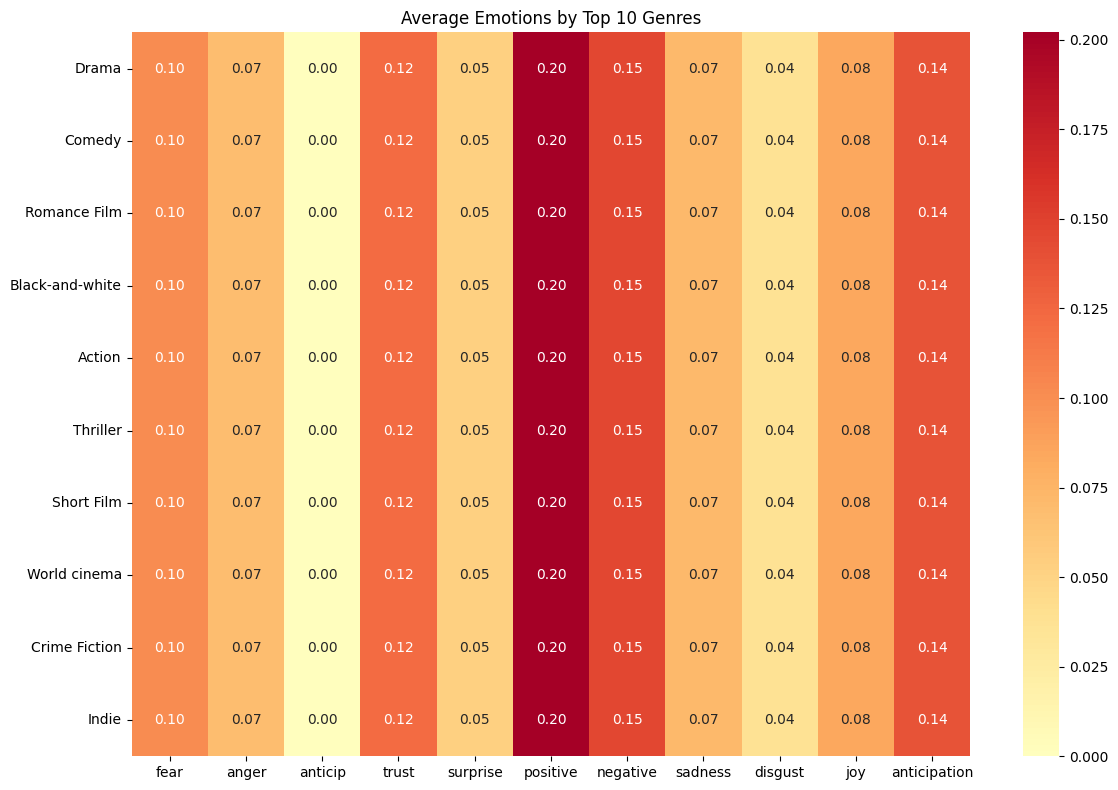

In [50]:
# Lets do the plots again but for the endings
plot_top_genres('ending_nrclex')

# OK... it  still looks pretty unusable

In [79]:
# Try with roberta in batches (it's takes a WHILE so let's just do the first 8000)

df_subset = df[:8000]

# Process endings with progress bar
from tqdm import tqdm
tqdm.pandas()
df_subset['ending_roberta'] = df_subset['ending'].progress_apply(lambda x: get_emotions_roberta(x) if pd.notna(x) else None)

100%|██████████| 8000/8000 [03:44<00:00, 35.60it/s]
/var/folders/rt/jn2s5gkd54j39mlcxql1zb840000gn/T/ipykernel_16423/4264394182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['ending_roberta'] = df_subset['ending'].progress_apply(lambda x: get_emotions_roberta(x) if pd.notna(x) else None)


In [80]:
# Save to csv
df_subset.to_csv(f'{DATA_FOLDER}/processed/df_subset.csv', index=False)



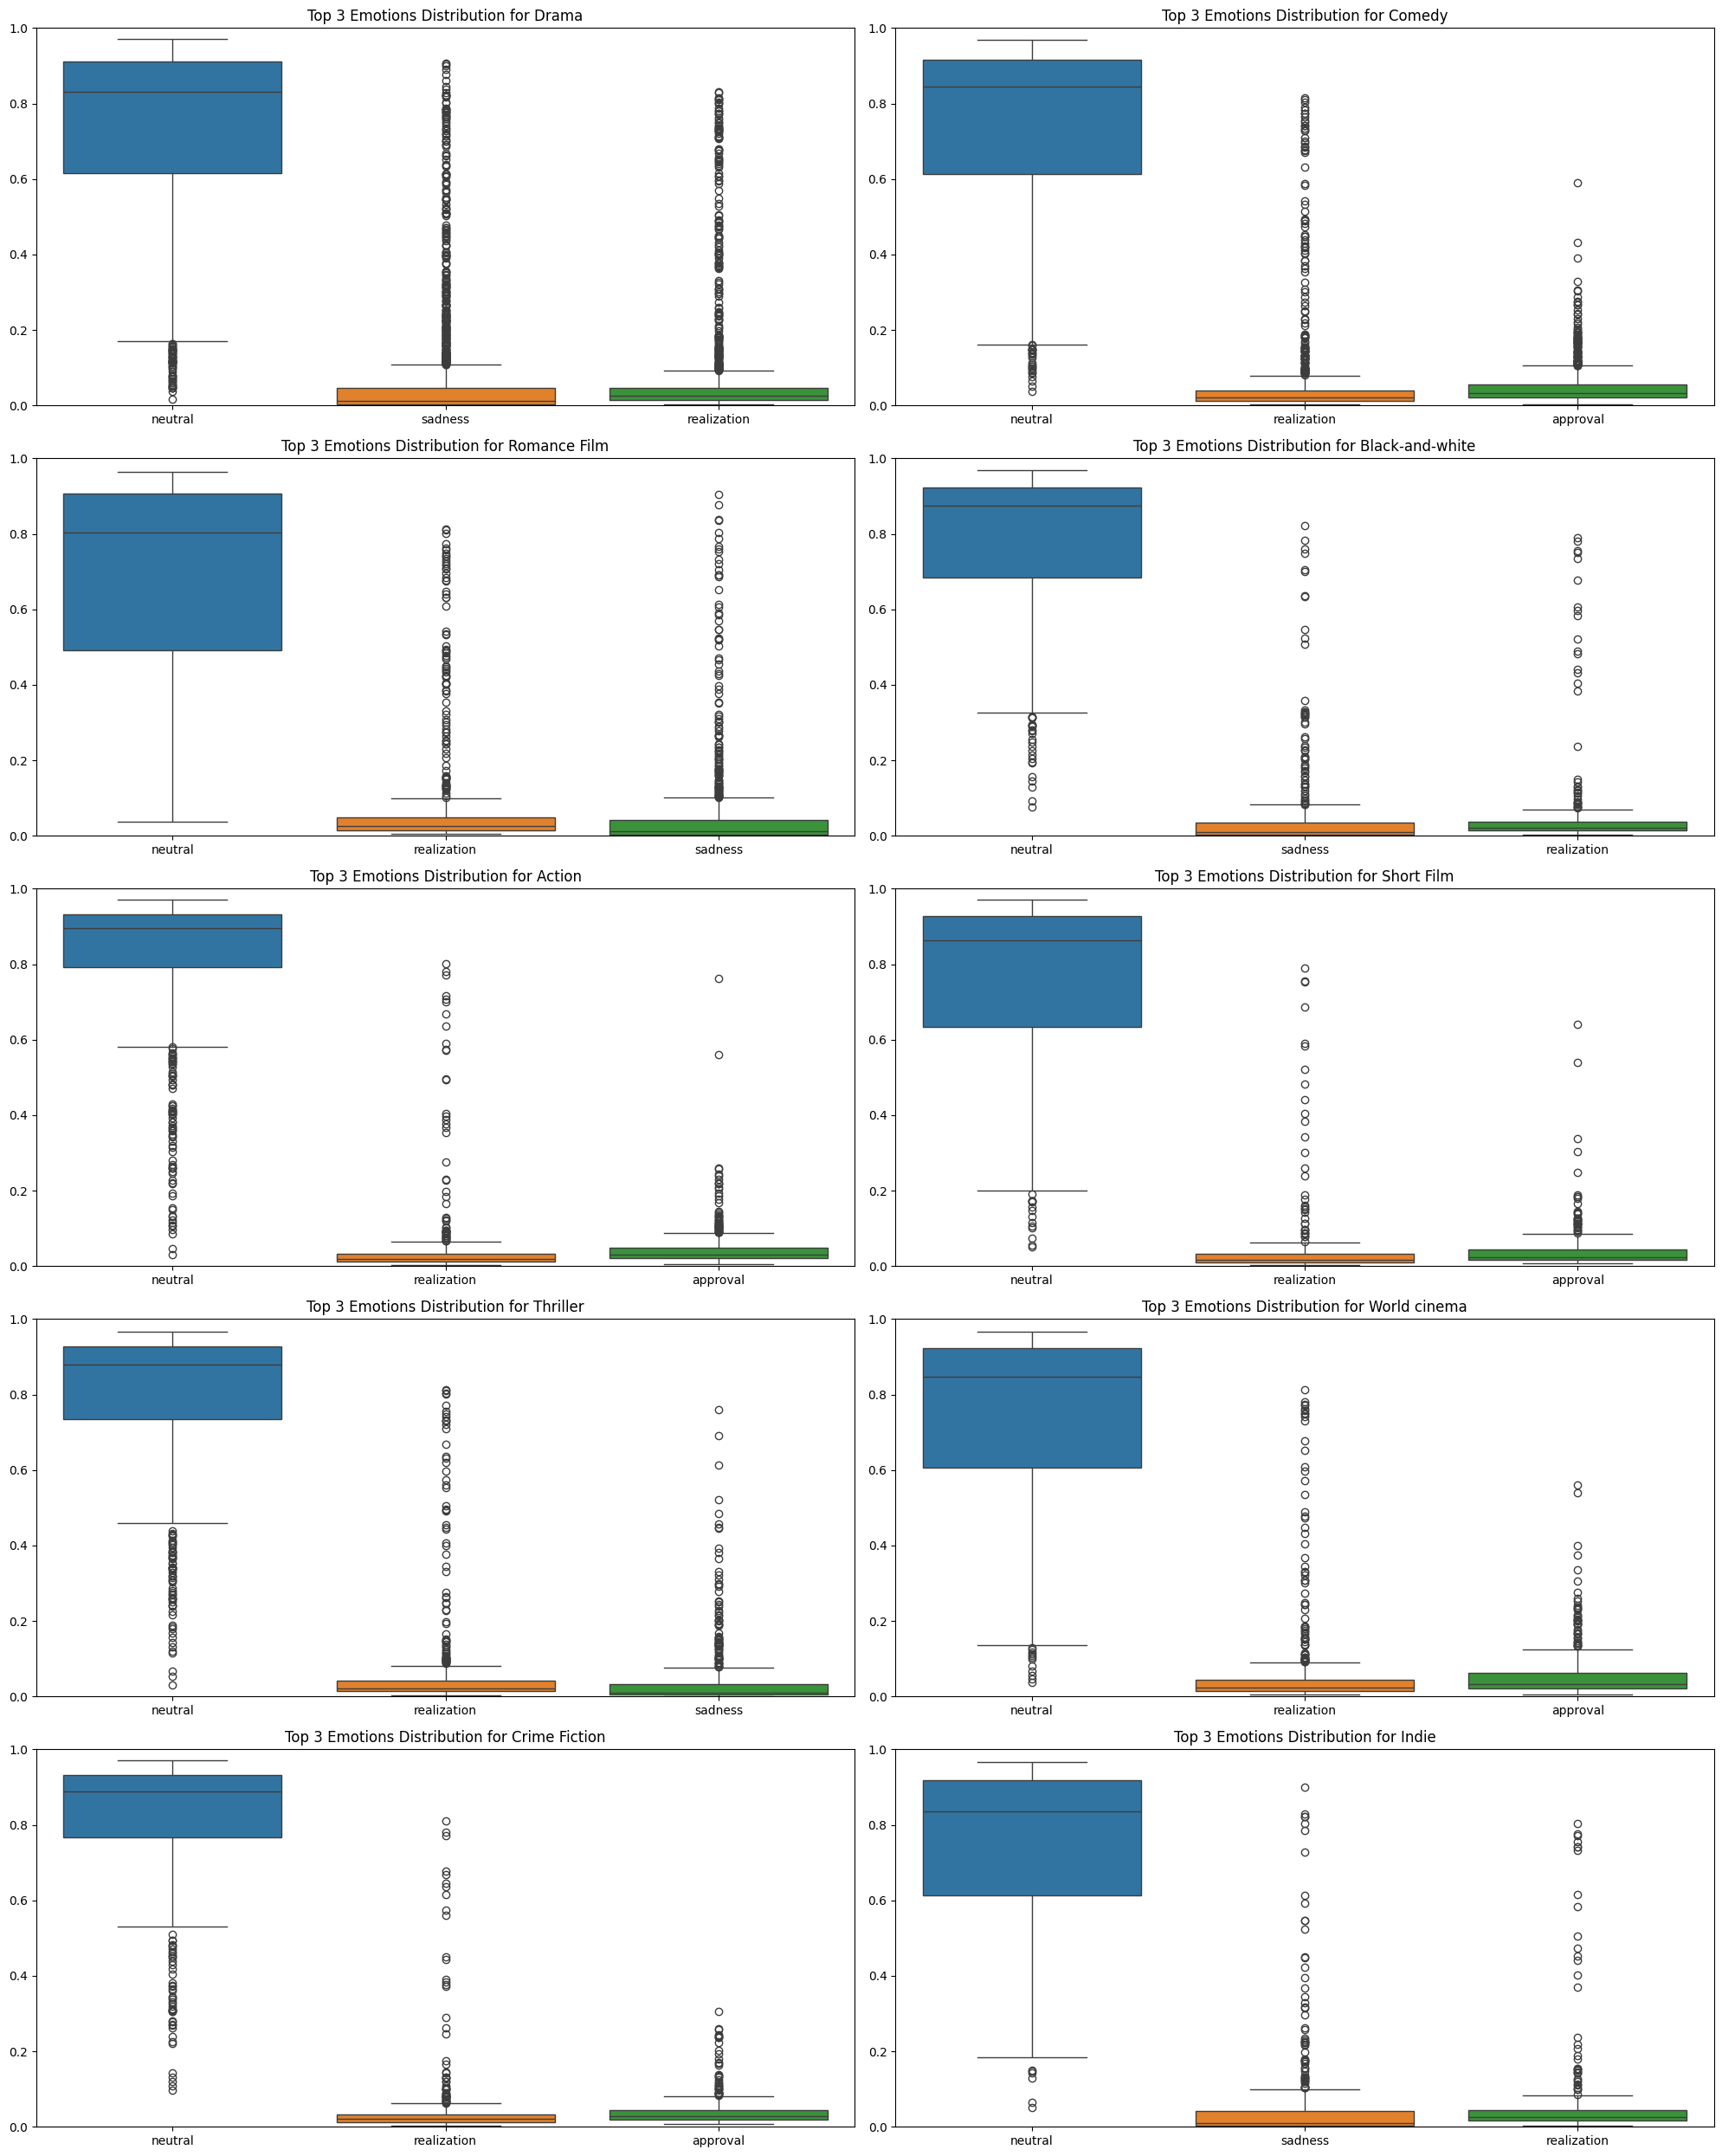

In [82]:
# Plot roberta emotions by genre
import seaborn as sns
import matplotlib.pyplot as plt

# Group by genre and get mean of each emotion
all_genres = []
for genres in df_subset['Genre_list'].dropna():
    all_genres.extend(genres)

# Get 10 most common genres
top_10_genres = pd.Series(all_genres).value_counts().head(10).index

# Create figure with subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# For each genre, get all the movies that belong to it and plot emotion distributions
for i, genre in enumerate(top_10_genres):
    movies_in_genre = df_subset[df_subset['Genre_list'].apply(lambda x: genre in x)]
    ending_roberta = movies_in_genre['ending_roberta'].dropna()
    
    # Convert list of dicts to DataFrame for easier plotting
    emotions_df = pd.DataFrame(list(ending_roberta))
    
    # Get top 3 emotions by mean value
    top_3_emotions = emotions_df.mean().nlargest(3).index
    
    # Plot boxplot for this genre with only top 3 emotions
    sns.boxplot(data=emotions_df[top_3_emotions], ax=axes[i])
    axes[i].set_title(f'Top 3 Emotions Distribution for {genre}')
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()
